# Assignment 6 - Timeseries

#### Author: Elaine R. Cazeta

## - Part 1:
Get the data from this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv), which contains information about the Knock Airport weather, and plot:  

- The temperature.  
- The mean temperature each day.  
- The mean temperature for each month.  

In [3]:
# Importing pandas library for data manipulation
import pandas as pd

# Importing Seaborn and matplotlib libraries to create plots
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
# Resources: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
# Resources (getting rid of the warning message - first load all columns): OpenAI
# Skip the first 23 rows as they have irrelevant data:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)

# Check the column names
print(df.columns)

Index(['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt',
       'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w',
       'sun', 'vis', 'clht', 'clamt'],
      dtype='object')


/tmp/ipykernel_41219/3001826161.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23)


In [5]:
# List of the columns that will be used
df = df[['date', 'temp', 'wdsp']]

# View first 3 rows
print(df.head(3))

                date  temp wdsp
0  10-apr-1996 14:00  11.5    0
1  31-jul-1996 08:00  11.5    0
2  31-jul-1996 09:00  11.6    0


In [6]:
# Check date type of column 'date'
print(df['date'].dtype)

object


In [7]:
# Convert column 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

/tmp/ipykernel_41219/889002016.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


datetime64[ns]


### - Plots:

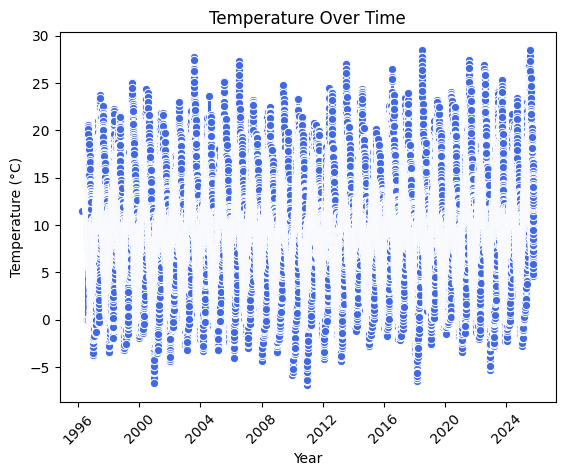

In [ ]:
# Temperature plot

# Resources: 
# OpenAI
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://seaborn.pydata.org/tutorial/properties.html

sns.lineplot(data=df, x='date', y='temp', color='royalblue', linewidth=2, marker='o')

plt.title('Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

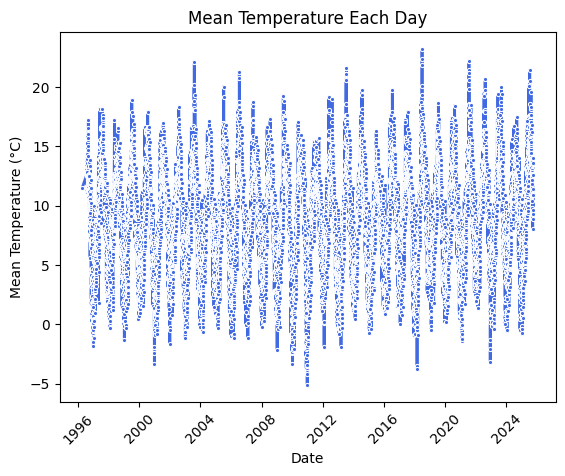

In [ ]:
# Plot - mean temperature per day:

# Group by day (ignore time) and calculate mean temperature
daily_mean = df.groupby(df['date'].dt.date)['temp'].mean().reset_index()

# Plot
sns.lineplot(data=daily_mean, x='date', y='temp', color='royalblue', linewidth=2, marker='.')
plt.title('Mean Temperature Each Day')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

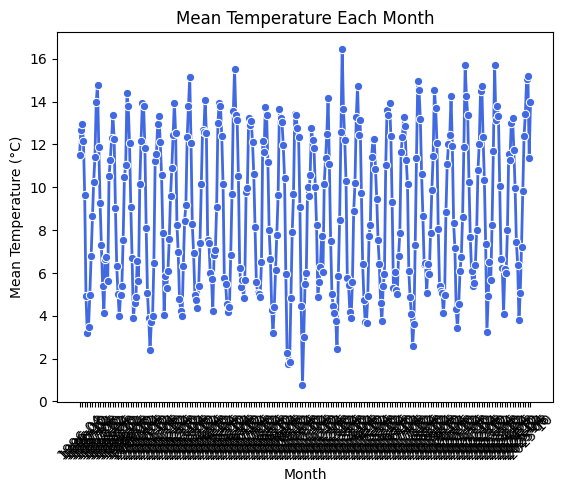

In [ ]:
# Plot - mean temperature per month:

# Group by month and calculate mean temperature
monthly_mean = df.groupby(df['date'].dt.to_period('M'))['temp'].mean().reset_index()

# Convert 'date' back to string for plotting nicely
monthly_mean['date'] = monthly_mean['date'].astype(str)

# Plot
sns.lineplot(data=monthly_mean, x='date', y='temp', color='royalblue', linewidth=2, marker='o')
plt.title('Mean Temperature Each Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

## - Part 2:
Plot:

- The Windspeed (there is data missing from this column).  
- The rolling windspeed (say over 24 hours).  
- The max windspeed for each day.  
- The monthly mean of the daily max windspeeds.  